# WeatherPy

## Overview
This notebook analyzes weather data to better understand what the weather is like as we approach the equator. It visualizes the weather of 500+ randomly selected cities across the world using the the OpenWeatherMap API, and creates a representative model of weather across world cities.

## Key Findings
* **Temperature:** The data clearly shows that, the closer we get to the equator the hotter the temperatures.
* Unlike temperature, other weather trends tend to depend on which hemisphere we are looking at, as the Northern Hemisphere is experiencing winter right now, while the Southern hemisphere is experiencing summer. So, for example:
   - **Humidity:** In the Northern Hemisphere right now, the further north we go, the more humid it gets. 
       - This makes sense, given that it is currently winter here, the time of year when we get winter storms bringing a lot of precipitation to the more northerly latitudes (particularly above 40 degrees).
   - **Cloudiness:** In the Northern Hemisphere right now, the further north we go (away from the equator), the cloudier it gets. However, in the Southern Hemisphere, it gets cloudier closer to the equator.
       - This can likely be explained by the prevalence of winter storms in the Northern latitudes (particularly above 40 degrees), while summer in the Southern Hemisphere is cyclone season at the equator.
   

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json
from pprint import pprint
from datetime import datetime
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls



In [3]:
# Perform a weather check on each city using a series of successive API calls.

# Configure url for API calls
base_url= "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Define lists to store retrieved fields into
final_city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

num_cities = 0

# For each city, call the openweathermap.api org's current weather API
# Include a print log of each city as it's being processed (with the city number and city name).
print("Beginning Data Retrieval")
for city in cities:
    response = requests.get(url + city).json()
      
    try:
       
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        final_city_list.append(city)
        num_cities += 1
        print(f"Processing Record {num_cities} | {city}")
    
    # If there is no weather data available for this city, then skip it
    except:
        print("City not found. Skipping.....")
        pass
print("Data Retrieval Complete")

Beginning Data Retrieval
Processing Record 1 | bambanglipuro
Processing Record 2 | ushuaia
Processing Record 3 | jamestown
Processing Record 4 | tuktoyaktuk
Processing Record 5 | busselton
Processing Record 6 | provideniya
Processing Record 7 | carnarvon
Processing Record 8 | rikitea
Processing Record 9 | leh
Processing Record 10 | bredasdorp
Processing Record 11 | harper
Processing Record 12 | mataura
Processing Record 13 | hermanus
Processing Record 14 | maihar
Processing Record 15 | vaini
Processing Record 16 | touros
Processing Record 17 | hualmay
City not found. Skipping.....
Processing Record 18 | bandarbeyla
Processing Record 19 | punta arenas
Processing Record 20 | hameenlinna
City not found. Skipping.....
Processing Record 21 | qaanaaq
Processing Record 22 | korla
Processing Record 23 | daura
Processing Record 24 | puerto ayora
Processing Record 25 | ust-nera
Processing Record 26 | thompson
Processing Record 27 | bambous virieux
Processing Record 28 | arona
Processing Record 2

Processing Record 225 | alpoyeca
Processing Record 226 | zhigansk
City not found. Skipping.....
Processing Record 227 | mirabad
Processing Record 228 | bogatyr
Processing Record 229 | vologda
Processing Record 230 | airai
Processing Record 231 | ornskoldsvik
Processing Record 232 | meulaboh
Processing Record 233 | lavrentiya
Processing Record 234 | capitan bado
Processing Record 235 | leningradskiy
Processing Record 236 | opuwo
Processing Record 237 | priiskovyy
Processing Record 238 | adre
Processing Record 239 | broken hill
Processing Record 240 | tumpat
Processing Record 241 | darlington
Processing Record 242 | soloneshnoye
Processing Record 243 | lasa
Processing Record 244 | rovinj
Processing Record 245 | fortuna
Processing Record 246 | ust-uda
Processing Record 247 | pangnirtung
Processing Record 248 | okha
Processing Record 249 | ugoofaaru
Processing Record 250 | sorong
Processing Record 251 | iquique
City not found. Skipping.....
Processing Record 252 | nerchinskiy zavod
Process

City not found. Skipping.....
Processing Record 459 | pahrump
Processing Record 460 | fort nelson
Processing Record 461 | camacupa
Processing Record 462 | asyut
Processing Record 463 | awbari
Processing Record 464 | imbituba
Processing Record 465 | leshukonskoye
Processing Record 466 | tarauaca
Processing Record 467 | longkou
Processing Record 468 | goure
Processing Record 469 | abashiri
Processing Record 470 | marawi
Processing Record 471 | san marcos
Processing Record 472 | ransang
Processing Record 473 | shenjiamen
Processing Record 474 | yagodnoye
Processing Record 475 | banjar
Processing Record 476 | bonthe
Processing Record 477 | cabedelo
City not found. Skipping.....
Processing Record 478 | margate
Processing Record 479 | port-gentil
Processing Record 480 | salta
Processing Record 481 | karaman
Processing Record 482 | yakeshi
Processing Record 483 | naron
Processing Record 484 | padang
Processing Record 485 | marathon
Processing Record 486 | asau
Processing Record 487 | lorengau

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dataframe containing the city weather data returned by the API
interim_city_df = pd.DataFrame({
    'City': final_city_list,
    'Latitude': lat,
    'Longitude': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})

# Remove any cities where the humidity is greater than 100%
city_df = interim_city_df[interim_city_df.Humidity <= 100]

# Write the data to a csv file
city_df.to_csv(output_data_file)

# Convert the date format for use in later plots
raw_date = datetime.fromtimestamp(city_df["Date"].iloc[0])
date = raw_date.strftime("%m-%d-%y")

# Display the new dataframe
city_df.head(100)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambanglipuro,-7.9500,110.2833,76.75,85,99,4.03,ID,1612381196
1,ushuaia,-54.8000,-68.3000,55.40,58,20,17.27,AR,1612381197
2,jamestown,42.0970,-79.2353,30.99,69,1,13.80,US,1612381120
3,tuktoyaktuk,69.4541,-133.0374,-41.80,66,75,4.61,CA,1612381197
4,busselton,-33.6500,115.3333,52.00,78,0,18.14,AU,1612381198
...,...,...,...,...,...,...,...,...,...
95,suez,29.9737,32.5263,66.25,43,98,16.98,EG,1612381228
96,avarua,-21.2078,-159.7750,84.20,74,79,8.05,CK,1612381228
97,longyearbyen,78.2186,15.6401,23.00,74,75,11.50,SJ,1612381224
98,hasaki,35.7333,140.8333,33.80,64,75,3.44,JP,1612381229


## Latitude vs. Temperature Plot

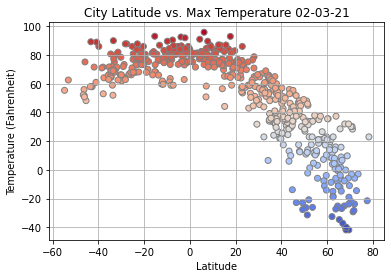

In [8]:
# Generate a scatter plot using latitude and temperature
x_axis = city_df['Latitude']
y_axis = city_df['Max Temp']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='coolwarm',edgecolor='gray')

# add labels and title
plt.xlabel('Latitude')
plt.ylabel('Temperature (Fahrenheit)')
plt.title(f'City Latitude vs. Max Temperature {(date)}')
plt.grid()
plt.savefig('output_data/Lat_vs_Temp_Scatter.png')
plt.show()


**Notes on Latitude vs. Temperature Plot**
- The temperature scale on this plot goes from blue (coldest temperatures) to red (hottest).
- Based on the shape of this plot, we can conclude that the closer we are to the equator (latitude=0) the hotter the temperature!

## Latitude vs. Humidity Plot

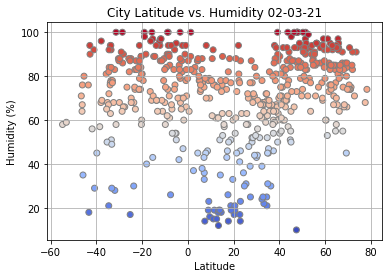

In [9]:
# Generate a scatter plot using latitude and humidity
x_axis = city_df['Latitude']
y_axis = city_df['Humidity']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='coolwarm',edgecolor='gray')

# add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity {(date)}')
plt.grid()
plt.savefig('output_data/Lat_vs_Humidity.png')
plt.show()



**Notes on Latitude vs. Humidity Plot**
- The humidity scale on this plot goes from blue (lowest humidity) to red (highest).
- Although the correlation doesn't appear to be as strong as in the latitude vs temperature plot, it does appear that the regions between 0-40 degrees latitude do tend to have lower humidity levels, and areas above 40 degrees latitude tend to have the highest humidity levels. 

## Latitude vs. Cloudiness Plot

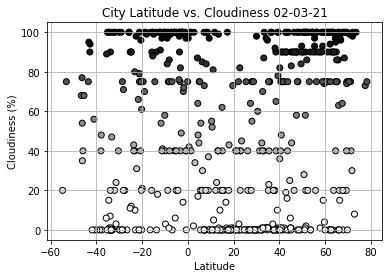

In [10]:
# Generate a scatter plot using latitude and cloudiness
x_axis = city_df['Latitude']
y_axis = city_df['Cloudiness']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='Greys',edgecolor='black')

# add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness {(date)}')
plt.grid()
plt.savefig('output_data/Lat_vs_Cloudiness.png')
plt.show()

**Notes on Latitude vs. Cloudiness Plot**
- The cloudiness scale on this plot goes from light grey (least clouds) to dark grey (most).
- Although the pattern looks weak, at best, it does appear that the regions between 0-40 degrees latitude tend to have less cloudy skies than other regions. Since it is now winter in the Northern Hemisphere, that could be a seasonal effect. It may be related to the fact that the cyclones that occur in these areas (which are a primary contributor to cloudiness) are stronger in the summer.

## Latitude vs. Wind Speed Plot

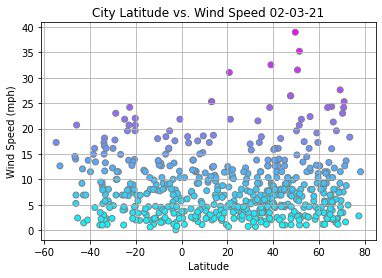

In [11]:
# Generate a scatter plot using latitude and wind speed
x_axis = city_df['Latitude']
y_axis = city_df['Wind Speed']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='cool',edgecolor='gray')

# add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed {(date)}')
plt.grid()
plt.savefig('output_data/Lat_vs_WindSpeed.png')
plt.show()

**Notes on Latitude vs. Wind Speed Plot**
- The wind speed scale on this plot goes from light blue (least windy) to purple (windiest).
- Although there doesn't appear to be a strong trend in this data, it does appear that the regions further away from the equator tend to have the strongest winds. The area between -20 and +20 of the equator appear to have the lowest winds (most of the locations in this area have wind speeds below 10mph). This would appear consistent with what I learned in high school about the lessening of the trade winds in the immediate vicinity of the equator that sailors called the "doldrums". 

## Linear Regression

In [12]:
# Split up the data into a df for each hemisphere in order to create the next series of linear regression models
northern_df = city_df.loc[city_df['Latitude'] >= 0]
southern_df = city_df.loc[city_df['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:-0.87.


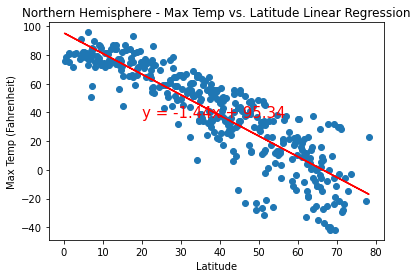

In [13]:
# Calculate the correlation coefficient and linear regression model 
# for Max Temp and Latitude for the Northern Hemisphere

correlation = st.pearsonr(northern_df['Latitude'],northern_df['Max Temp'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = northern_df['Latitude']
y_values = northern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Fahrenheit)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('output_data/NLat_vs_MaxTemp_Reg.png')
plt.show()


**Notes on Max Temp vs. Latitude Linear Regression in the Northern Hemisphere**
- There is a srong negative correlation between temperature and latitude in the Northern Hemisphere. The further north we go, the colder it gets.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.53.


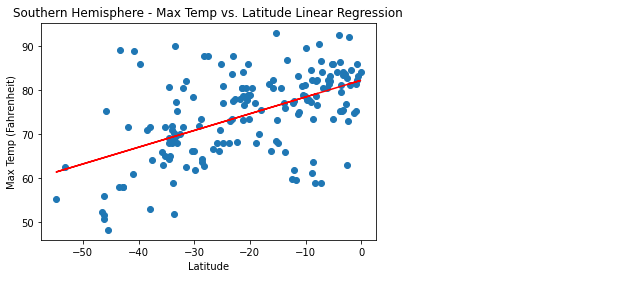

In [14]:
# Calculate the correlation coefficient and linear regression model 
# for Max Temp and Latitude for the Southern Hemisphere

correlation = st.pearsonr(southern_df['Latitude'],southern_df['Max Temp'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = southern_df['Latitude']
y_values = southern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Fahrenheit)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('output_data/SLat_vs_MaxTemp_Reg.png')
plt.show()

**Notes on Max Temp vs. Latitude Linear Regression in the Southern Hemisphere**
- There is a moderate negative correlation between temperature and latitude in the Southern Hemisphere. The further south we go, the colder it gets. Keep in mind that it is currently summer in the Southern Hemisphere, so the temperatures aren't as extreme as those in our previous chart (Northern Hemisphere).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.43.


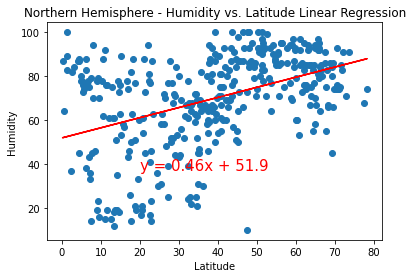

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for Humidity and Latitude for the Northern Hemisphere

correlation = st.pearsonr(northern_df['Latitude'],northern_df['Humidity'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig('output_data/NLat_vs_Humidity_Reg.png')
plt.show()

**Notes Humidity (%) vs. Latitude Linear Regression in the Northern Hemisphere**
- There is a weak positive correlation between humidity and latitude in the Northern Hemisphere. The further north we go, the more humid it gets. Keep in mind that it is currently winter in the Northern Hemisphere, the time of year when we get winter storms bringing a lot of precipitation to the more northerly latitudes. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.19.


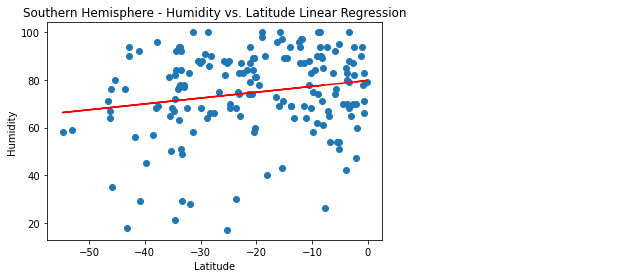

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for Humidity and Latitude for the Southern Hemisphere

correlation = st.pearsonr(southern_df['Latitude'],southern_df['Humidity'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig('output_data/SLat_vs_Humidity_Reg.png')
plt.show()

**Notes Humidity (%) vs. Latitude Linear Regression in the Southern Hemisphere**
- There is no correlation to speak of between humidity and latitude in the Southern Hemisphere. However, the further south we go, the less humid it tends to be. This is likely an effect of the extreme temperatures at the South Pole, which cause the air to hold less moisture - a trend that would likely become much more visible during the Southern Hemisphere winter. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.35.


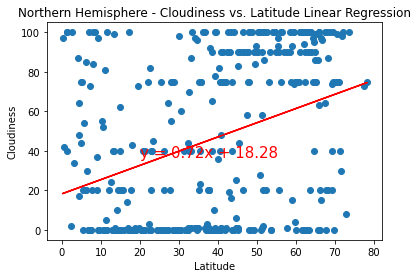

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for Cloudiness and Latitude for the Northern Hemisphere

correlation = st.pearsonr(northern_df['Latitude'],northern_df['Cloudiness'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig('output_data/NLat_vs_Cloudiness_Reg.png')
plt.show()

**Notes on Cloudiness vs. Latitude Linear Regression in the Northern Hemisphere**
- There is a very weak correlation between cloudiness and latitude in the Horthern Hemisphere. However,as we head north from the equator, and pass the 40 degree line, we see that it is much cloudier than it is closer to the equator. This is likely an effect of the winter storms in the Northern Hemisphere.  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.32.


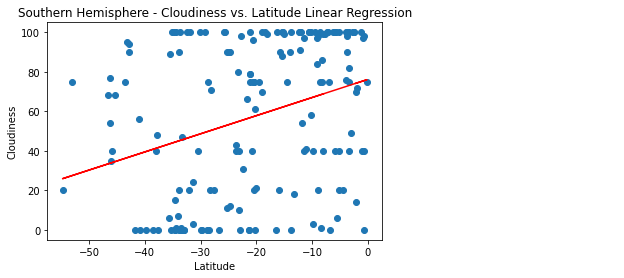

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for Cloudiness and Latitude for the Southern Hemisphere

correlation = st.pearsonr(southern_df['Latitude'],southern_df['Cloudiness'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig('output_data/SLat_vs_Cloudiness_Reg.png')
plt.show()

**Notes on Cloudiness vs. Latitude Linear Regression in the Southern Hemisphere**
- There is a very weak correlation between cloudiness and latitude in the Southern Hemisphere. However, it does tend to be more cloudy closer to the equator. This is likely an effect of the cyclone season, which occurs in the Southern Hemisphere summer.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.09.


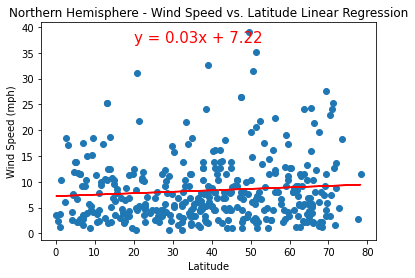

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for Wind Speed and Latitude for the Northern Hemisphere

correlation = st.pearsonr(northern_df['Latitude'],northern_df['Wind Speed'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig('output_data/NLat_vs_WindSpeed_Reg.png')
plt.show()

**Notes on Wind Speed vs. Latitude Linear Regression in the Northern Hemisphere**
- There is no correlation between wind speed and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:-0.14.


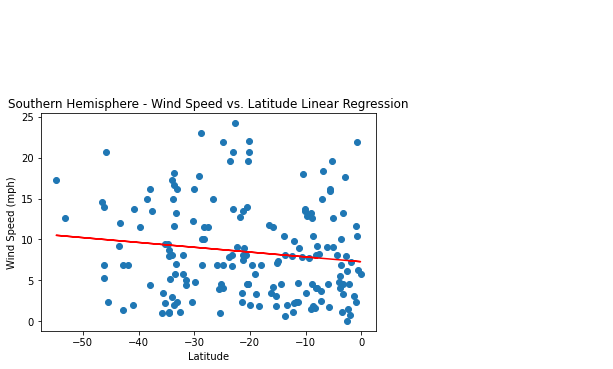

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for Wind Speed and Latitude for the Northern Hemisphere

correlation = st.pearsonr(southern_df['Latitude'],southern_df['Wind Speed'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig('output_data/SLat_vs_WindSpeed_Reg.png')
plt.show()

**Notes on Wind Speed vs. Latitude Linear Regression in the Southern Hemisphere**
- There is no correlation between wind speed and latitude in the Southern Hemisphere.